# Exercício Computacional 1 - Aritmética de Ponto Flutuante e Eliminação de Gauss



---




**Data de entrega:** Até 07 de Maio de 2023

**Como entregar:** Enviar o jupyter notebook (arquivo .ipynb) pelo pelo próprio Classroom.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais, mas interessantes, podendo ser desafiadoras. 
*   Faça uma cópia do notebook para o seu Google Drive e use o Google Colab para executar o notebook e fazer a tarefa.
*   A atividade vai ser baseada no seu número USP para que as soluções dos alunos fiquem diferentes. 
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo às atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros. 
*   Você deverá entregar apenas uma cópia do jupyter notebook (.ipynb) no Classroom, na funcionalidade de "entregar" do Classroom. 
*   Foi estimado um tempo total aproximado de 2-3 horas para realização completa da atividade.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 0:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:





*Assinatura:* Lucas Carvalho



---





Primeiro vamos carregar algumas bibliotecas: Numpy, Scipy Linear Algebra (scipy.linalg), System (sys) e Time (time)

In [1]:
import numpy as np
import scipy.linalg as la 
import sys
import time

Agora vamos definir alguns números especiais ("magic") para cada aluno, com base no seu número USP

In [2]:
# Coloque aqui o seu número USP
nusp = 11850649

Estes números serão importantes para a atividade:

In [3]:
magic_ilong = int(str(nusp).replace("0",""))
magic_ishort = int(str(magic_ilong)[:2])
print("magic_ilong  =", magic_ilong)
print("magic_ishort =", magic_ishort)

magic_ilong  = 1185649
magic_ishort = 11




---




## Aritmética de Ponto Flutuante

Começamos esse tutorial discutindo um pouco de aritmética de ponto flutuante, que vamos definir mais adiante.



Algumas referências:

[1]https://en.wikipedia.org/wiki/IEEE_754

[2] https://betterprogramming.pub/floating-point-numbers-are-weird-in-python-heres-how-to-fix-them-51336e4ad51a

[3] https://ironpython-test.readthedocs.io/en/latest/tutorial/floatingpoint.html


A matemática está furada no computador?

In [4]:
a = 10
b = 0.1
c = 0.2

In [5]:
r1 = a*(b + c)
r2 = a*b + a*c

r1 e r2 deveriam ser iguais...Mas...

In [6]:
print(r1 == r2)

False


In [7]:
print(r1, r2)

3.0000000000000004 3.0


A distributiva e associatividade não valem no computador ?!?!

In [8]:
.2 + .2 + .2 == 0.6

False

In [9]:
sum = 0.0
n = 10
for i in range(n):
    sum += 1/n
print(sum)

0.9999999999999999


Vamos tentar entender os motivos partindo bem do princípio: como o computador representa os números!

### Números inteiros no computador

Suponha que tenho apenas 3 bits para representar inteiros (ignore o sinal). Ou seja, temos os números binários
000, 001, 011, 100, 110, ..., 111
que representam respectivamente
0, 1, 2, 3, 4, 5, ..., 7
sendo 7 o maior número que conseguimos representar.

Vejamos isso em Python:

In [10]:
a = 5
b = 6

In [11]:
bin_a=bin(a)
bin_b=bin(b)
print(a, bin_a)
print(b, bin_b)

5 0b101
6 0b110


Os dois números estão bem representados, mas...

In [12]:
print(a+b, bin(a+b))

11 0b1011


isso não é representável em 3 bits (o Python, espertinho, percebeu isso e então colocou mais um bit para representar o número 11...).

Em um computador moderno teríamos 64bits para representar um inteiro, e um sinal para carregar.

Veja aqui mais detalhes: https://prof-thiagooliveira.netlify.app/post/signed-and-unsigned-binary-numbers/

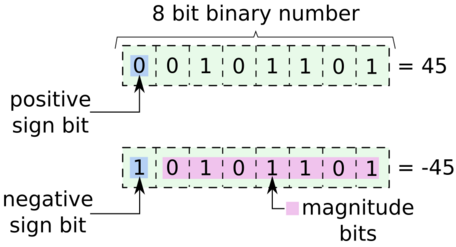



---




#### ❗**Exercício 1**❗

Qual o maior número positivo que podemos representar em inteiros com sinal se tivermos uma representação com magic_ishort bits? Justifique.

In [13]:
#Resposta 
print(magic_ishort)

11


# Resposta

Seguindo a representação em binário com sinal magnitude, teremos o bit mais significativo responsável pelo sinal do número, e os demais 10 bits responsáveis por representar o número de fato. A partir de um estudo de combinação simples, podemos chegar no seguinte:

$$total = 2.2^{10}=2048$$





---



E no Python, quantos bits ele usa?

Por "sorte", o Python usa _long int_ e estende a precisão no caso de inteiros se necessário, então é difícil termos problemas com inteiros em Python...Ufa!


### Números "reais" no computador

Agora começa o problema: como o computador representa números reais no computador?

Ele usa o que é conhecido como *ponto flutuante*, que nada mais é que uma padronização da nossa notação científica:




dcd36557db1b343d74991d99aeb50aadce64eb3a.svg

Mas **cuidado**, pois o computador não trabalha com base 10, e sim base 2 (binária), com ponto flutuante. Para facilitar o entendimento de alguns processos, muitos textos adotam a base 10, mas sempre temos que ter em mente que no fundo será usado a base 2.

Em 32 bits, no padrão IEEE-754 temos:


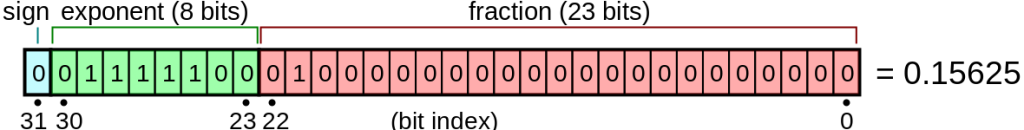

Isto é:


*   1 bit para o sinal (+/-)
*   8 bits para o expoente. Como precisamos de um sinal para o expoente, por convenção o expoente é subtraído por 127, que é 01111111 em binário (em precisão simples, float).
*   23 bits para a fração (mantissa)



*Desafio:* a parte da "fração", que gostaríamos que representasse casas "decimais", precisa ser montada com base binária! Ou seja, muitos números não serão passíveis de serem representados, ou são representados com algum erro. 

Vejam alguns exemplos :





---


**Número "1"** em ponto flutuante é dado, em 32 bits, por:

$\color{blue}{0}\color{green}{01111111}\color{red}{00000000000000000000000}$

onde as cores indicam o $\color{blue}{sinal}$, o $\color{green}{expoente}$,  e a $\color{red}{mantissa}$, respectivamente.

Traduzindo (em binário ainda...):

$ (−1)^\color{blue}{0}×​2^{(\color{green}{01111111} − 01111111)​}\times ​1.\color{red}{00000000000000000000000} $

Traduzindo para decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{0}}×\color{red}{​1.0} = 1.0 $ (exato!).



---



**Número "0.5"** é só um pouco diferente do 1 em ponto flutuante é dado, em 32 bits:

No computador:
$\color{blue}{0}\color{green}{01111110}\color{red}{00000000000000000000000}$

Binário:
$ (−1)^\color{blue}{0}×​2^{(\color{green}{01111110} − 01111111)​}\times ​1.\color{red}{00000000000000000000000} $

Decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{-1}}×\color{red}{​1.0} = 0.5$ (exato!).



---


**Número "0.05"** complica, e muito, vejamos:

No computador: $\color{blue}{0}\color{green}{01111010}\color{red}{10011001100110011001101}$

Binário: $ (−1)^\color{blue}{0}×​2^{(\color{green}{01111010} − 01111111)​}\times ​1.\color{red}{10011001100110011001101} $

Decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{-5}}×1.\color{red}{60000002384185791015625} \approx 0.0500000007450580596923828125​$ - Não conseguimos representar exatamente :-( .


---



Referência: https://float.exposed/0xb3bc8b0f



---


#### ❗**Exercício 2**❗


1.   Qual o maior número representável em Python por aritmética de ponto flutuante no sistema que você está usando? (DICA: use a biblioteca sys.float_info (https://docs.python.org/3/library/sys.html) para saber mais sobre como o seu sistema trabalha com o tipo "float")

2.   O que acontece se chamar em Python um número maior que esse? Ou se fizer uma conta que resulte em um número maior que esse? (Dê um exemplo)

3. Quantos dígitos são bem representados nesse sistema de aritmética de ponto flutuante? (DICA: use o sys.float_info)

4. Qual o resultado da conta 1.0e-23 + 1.0e-23? Justifique.

5. Qual o resultado da conta 1.0 + 1.0e-23? Justifique.

6. Qual o resultado da conta 1.0e+14 + 1.0e-14? Justifique.

7. Leia o tutorial https://docs.python.org/pt-br/3/tutorial/floatingpoint.html e comente por que o computador não consegue representar o número 0.1 exatamente. Qual número aproximado é alocado na memória e usado nas contas?

8.  Escreva o seu número USP como um int em binário.

9.  Escreva o seu número USP como um double float em binário (explicite cada componente, incluindo sinal, mantissa e expoente, da forma: $(−1)^\color{blue}{X}×​2^{(\color{green}{YYYYYYYYY} − 01111111)​}\times ​1.\color{red}{ZZZZZZZZZZZ} $).




In [14]:
# Códigos usados na resposta ilustrando cada caso
# 1.
print("Maior número:", sys.float_info.max)
# 2.
print("Output de exemplo:", 2*sys.float_info.max)

# 3.
print("dígitos bem representados na mantissa:", sys.float_info.mant_dig)
print("dígitos bem representados em ponto flutuante:", sys.float_info.dig)
# 4.
print("Resultado:", 1.0e-23 + 1.0e-23) 

# 5.
print("Resultado:", 1.0 + 1.0e-23)  

# 6.
print("Resultado:", 1.0e+14 + 1.0e-14)  

# 7. 
print(0.1000000000000000055511151231257827021181583404541015625)

# 8.
print(101101101101101011001001)

# 9.
print("0 10000010110 0110110110110110110010010000000000000000000000000000")

Maior número: 1.7976931348623157e+308
Output de exemplo: inf
dígitos bem representados na mantissa: 53
dígitos bem representados em ponto flutuante: 15
Resultado: 2e-23
Resultado: 1.0
Resultado: 100000000000000.0
0.1
101101101101101011001001
0 10000010110 0110110110110110110010010000000000000000000000000000


**Responder aqui com texto as justificativas e observações:**



1.   

Para descobrir o maior número representável, podemos usar o valor de sys.float_info.max, que é o maior número representável em ponto flutuante na máquina atual.

Isso significa que o maior número representável em ponto flutuante em Python neste sistema é aproximadamente 1.7976931348623157 × 10^308. 

2.   

Qualquer número maior do que isso será considerado infinito na aritmética de ponto flutuante em Python, e sua saída será "inf".

3.  

Para saber quantos dígitos são bem representados no sistema em que estou trabalhando, posso usar a biblioteca sys.float_info em Python. Em particular, o valor sys.float_info.mant_dig indica o número de dígitos que podem ser bem representados na mantissa (parte fracionária) de um número em ponto flutuante. O valor sys.float_info.dig indica o número total de dígitos que podem ser bem representados em um número em ponto flutuante.

Isso significa que no meu sistema atual, a mantissa de um número em ponto flutuante pode representar até 53 dígitos com precisão. No entanto, devido à limitação da precisão do expoente, o número total de dígitos que podem ser bem representados é limitado a 15. Qualquer número com mais de 15 dígitos pode ser arredondado ou truncado na representação de ponto flutuante.

4.  

Isso ocorre porque ambos os números são muito pequenos, e quando somados, o resultado ainda pode ser representado com precisão na aritmética de ponto flutuante.

Na representação decimal, o resultado seria 0.000000000000000000000002, o que é um número muito pequeno e difícil de ser trabalhado diretamente em cálculos numéricos. Por isso, é comum usar a notação científica, como 2.0e-23, para representar esse número de forma mais clara e concisa.

5.  

Isso ocorre porque o segundo número, 1.0e-23, é muito pequeno em relação ao primeiro número, 1.0, e acaba sendo arredondado para zero na representação em ponto flutuante.

Na aritmética de ponto flutuante, números muito pequenos têm uma precisão limitada devido à limitação do número de bits usados para representar a mantissa e o expoente. Por isso, quando o número 1.0e-23 é somado com 1.0, o resultado é arredondado para 1.0, que é o valor mais próximo que pode ser representado com precisão nesse sistema de ponto flutuante.

6.  

Isso ocorre porque o segundo número, 1.0e-14, é muito pequeno em relação ao primeiro número, 1.0e+14, e a sua contribuição para o resultado é desprezível. O resultado final é, portanto, aproximadamente igual a 1.0e+14.

No entanto, como os números envolvidos na operação são muito grandes, a adição de 1.0e-14 ao número 1.0e+14 causa uma perda de precisão na mantissa do número maior. Isso significa que o resultado da soma não é exatamente igual a 1.0e+14, mas sim o valor aproximado 100000000000000.00001.

7.  

Quando um número como 0.1 é representado como um número de ponto flutuante, é armazenada uma aproximação para esse número. Essa aproximação pode ser muito próxima do número real em alguns casos, mas em outros casos pode haver uma diferença perceptível.

No caso do Python, o número aproximado que é alocado na memória para representar o número 0.1 é 0.1000000000000000055511151231257827021181583404541015625. Este é o número mais próximo que pode ser representado em aritmética de ponto flutuante pelo tipo float do Python.

8.  

101101101101101011001001

11850649 / 2 = 5925324 (resto 1) \\
5925324 / 2 = 2962662 (resto 0) \\
2962662 / 2 = 1481331 (resto 0) \\
1481331 / 2 = 740665 (resto 1) \\
740665 / 2 = 370332 (resto 1) \\
370332 / 2 = 185166 (resto 0) \\
185166 / 2 = 92583 (resto 0) \\
92583 / 2 = 46291 (resto 1) \\
46291 / 2 = 23145 (resto 1) \\
23145 / 2 = 11572 (resto 1) \\
11572 / 2 = 5786 (resto 0) \\
5786 / 2 = 2893 (resto 0) \\
2893 / 2 = 1446 (resto 1) \\
1446 / 2 = 723 (resto 0) \\
723 / 2 = 361 (resto 1) \\
361 / 2 = 180 (resto 1) \\
180 / 2 = 90 (resto 0) \\
90 / 2 = 45 (resto 0) \\
45 / 2 = 22 (resto 1) \\
22 / 2 = 11 (resto 0) \\
11 / 2 = 5 (resto 1) \\
5 / 2 = 2 (resto 1) \\
2 / 2 = 1 (resto 0) \\
1 / 2 = 0 (resto 1)


9.  

0110110110110110110010010000000000000000000000000000

O número 11850649 em notação científica binária normalizada é:

$$1.011011011011011011001001 × 2^{23}$$

O sinal é positivo, então o primeiro bit é 0. O expoente é 23, que é adicionado a 1023 (a "constante de polarização" do expoente em binário de 11 bits), resultando em 1046 ou 10000010110. A mantissa é formada pelos 52 bits fracionários da notação científica normalizada, que são 0110110110110110110010010000000000000000000000000000.

Double fica, dessa forma:

$$0 10000010110 0110110110110110110010010000000000000000000000000000
$$

$$1.1850649e+07 = (1) × 2^{1046-1023} × 1.0110110110110110110010010000000000000000000000000000
               = (+1) × 2^{23} × 1.0110110110110110110010010000000000000000000000000000
$$





---


### Simulando aritmética de ponto flutuante

Uma forma de simular a aritmética de ponto flutuante em diferentes tipos de computadores, com mais ou menos "bits" para representação numérica, é considerando o número de **algarismos significativos**.

Dada uma "máquina" com uma certa precisão, definimos o número de **algarismos significativos** como sendo o número de casas decimais, ou dígitos, que o computador consegue representar depois de transformado em notação científica.

Ex: Escreva os números na notação científica com 0,AAAAA x 10^B e verifique que

1000000 : possui 1 alg. sig.

0.00001 : possui 1 alg. sig.

1.00001 : possui 6 alg. sig.

0.12345 : possui 5 alg. sig.

Qualquer conta realizada deve ser ajustada (arredondada) no final para ficar nessa representação!



**Cuidado!** 

Essa representação com algarismos significativos na base 10 é uma simplificação para fins didáticos, pois lembre-se que o computador trabalha com base 2.





#### ❗**Exercício 3**❗

1.   Quantos algarismos significativos são necessários para representar o seu 
número USP na forma de um *float* em base 10? Justifique.

2.  Divida o seu número USP por 17. Represente o número resultante com aritmética de ponto flutuante com 5 algarismos significativos na base 10, arredondando se necessário.



In [15]:
#Código para resposta
print(nusp/17)

697097.0


**Resposta:**

$$11850649 = 0.11850649.10^{8}$$

Sâo necessários 8 algarismos significativos para representar o meu NUsp na forma float em base 10.

Dividindo o meu NUsp por 17, obtém-se 697097, que, ao ser representado na forma float em base 10 fica:

$$0.69710.10^{6}$$ 

Caso seja feito um truncamento ao invés de uma aproximação, fica:

$$0.69709.10^{6}$$ 





---



---




Para saber esse número de algarismos (dígitos) significativos na sua máquina, use:

In [16]:
print(sys.float_info.dig)

15


Em Python, podemos simular esses arredondamentos a cada operação usando a seguinte função:

In [17]:
!pip install sigfig
from sigfig import round


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Um computador com 16bit tem 3 algarismos significativos (10 bits de mantissa)

(precisão conhecida como "half precision float")


Um exemplo tentando calcular $\tan(\pi/2-0.001)$ numericamente:

In [18]:
# Computador de 16 bits (3 alg. sig.)
dig = 3

# Números em precisão dupla (64 bits)
# Python usa IEEE-754 double precision float
pi_double = np.pi
tan_double = np.tan(pi_double/2.0-0.001) #deveria ser bem grande!
print("Precisão dupla: ", pi_double, tan_double)

# Números em precisão "meia" (16 bits) simulada
# Todas as operações devem ser arredondadas!
pi_half = round(pi_double, dig)
tan_half = round(np.tan(round(round(pi_half/2.0,dig)-0.001,dig)), dig) #deveria ser bem grande!

print("Precisão meia :", pi_half, tan_half)


Precisão dupla:  3.141592653589793 999.9996666666933
Precisão meia : 3.14 1260.0




---



## Resolvendo Sistemas Lineares - Eliminação Gaussiana

### O problema 

$$ Ax=b $$

Para os problemas a seguir, você deve usar uma matriz especial, construída conforme o código abaixo. Há 3 parâmetros importantes na geração da matriz:

* **n** : o tamanho da matriz
* **magic_ilong** : o seu número mágico, que fará sua matriz ser única
* **cond_pow** : Um número inteiro que quando maior, torna o sistema mais difícil de ser resolvido, por estar mais propenso a erros de arredondamento. Este número será usado na contrução do *número de condição* da matriz gerada (https://pt.wikipedia.org/wiki/N%C3%BAmero_de_condicionamento). 

In [19]:
# Sistema linear para testes - específica para cada aluno
# ------------------------------------------------------------
# Entrada:
#  n: tamanho da mtriz
#  magic_ilong: seed de geração de números aleatórios
#  cond_pow : potência usada na definição do número de condição (inteiro positivo)
#
# Saída:
#   A: Matrix do sistema linear Ax=b
#   b: lado diretiro do sistema Ax=b
#   a: matriz aumentada [A|b]
def meu_sistema_linear(n=100, magic_ilong=magic_ilong, cond_pow=8):


  # Tamanho do sistema
  #n = 20

  np.random.seed(magic_ilong)

  # Gera matriz aleatória com número de condição alto usando decomposição QR
  cond = np.log(10**cond_pow) # Numero de condição
  exp_vec = np.arange(-cond/4., cond * (n + 1)/(4 * (n - 1)), cond/(2.*(n-1)))[:n]
  s = np.exp(exp_vec)
  S = np.diag(s)
  U, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
  V, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
  A = U.dot(S).dot(V.T)
  A = A.dot(A.T) #Simétrica

  #Vetor b - vamos gerar b tal que a solução seja sempre um vetor com 1
  x = np.ones((n))
  b = A@x
  

  #Matrix aumentada aleatória a=[A|b]
  a = np.c_[A,b]

  np.set_printoptions(precision=3, suppress=True)
  #print("A:" , A[:10, :10]) #imprimir só o começo da matriz
  #print()
  #print("b:", b[:10]) #imprimir só o começo do vetor b
  #print()
  #print("a:", a) #imprimir a matriz aumentada

  return A, b, a

#### 🧩 *Reflexão*

Você consegue explicar como essa matriz é gerada e discutir suas propriedades a partir desse código?

## Resposta

O código utiliza a decomposição QR para gerar uma matriz A com um número de condicionamento alto. A função gera um vetor s com valores exponenciais e cria uma matriz diagonal S com esses valores. A matriz S tem a propriedade de que a razão entre o maior e o menor valor singular (ou valor próprio no caso de matriz simétrica) é igual ao número de condicionamento cond.

Em seguida, a função gera matrizes aleatórias U e V e as aplica à matriz S para obter a matriz A. As matrizes U e V são geradas aleatoriamente com distribuição entre -5 e 5 multiplicadas por 200 para garantir que os valores não sejam ruins para operações.

Por fim, a função gera um vetor b de forma que a solução do sistema linear seja sempre um vetor com todos os elementos iguais a 1. Para isso, ela multiplica a matriz A por um vetor x com todos os elementos iguais a 1.

Basicamente, o objetivo é gerar a matriz A, a qual, por apresentar um elevado número de condicionamento, é extremamente instável, e sofre com pequenas oscilações nos seus coeficientes.



---



O algoritmo clássico, conforme visto em aula:

In [20]:
# Método Clássico de Eliminação Gaussiana
#
# O método recebe como entrada uma matrix aumentada a=[A|b], 
# com dimensões n linhas por n+1 colunas, tendo b na última
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
def elim_gauss(a_orig):
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)

  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
          
      for j in range(i+1, n):
          ratio = a[j,i]/a[i,i]
          for k in range(n+1):
              a[j,k] = a[j,k] - ratio * a[i,k]

  # Substituição
  x[n-1] = a[n-1,n]/a[n-1,n-1]

  for i in range(n-2,-1,-1):
      x[i] = a[i,n]
      
      for j in range(i+1,n):
          x[i] = x[i] - a[i,j]*x[j]
      
      x[i] = x[i]/a[i,i]

  return x

Vamos fazer um teste com uma matriz aleatória especial

Vamos testar o nosso esquema usando uma matriz com gerada com parâmetros:

* n = 300

In [21]:
start_time = time.time()
A, b, a = meu_sistema_linear(300, magic_ilong)
x = elim_gauss(a)
tempo_orig = time.time() - start_time
print()

print("Solução", x[:10]) #imprime só alguns elementos da solução
print("\n\nResíduo max|b-Ax|: ", np.max(np.abs(b-A@x)), " Tempo que levou: ", tempo_orig, " segundos")



Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  2.0463630789890885e-12  Tempo que levou:  6.209758996963501  segundos


**Desafios**


*   Esse método que implementamos parece funcionar, mas está muito lento! Como podemos melhorar a sua performance?

*   O resíduo parece bem grande, por que não está mais perto de 10e-16? (que seria o erro de arredondamento esperado para uma aritmética de ponto flutuante com 64 bits (double float)).

Vamos discutir esses dois pontos a seguir.



###Versão vetorizada do método de eliminação Gaussiana

Python é uma linguagem "interpretada", então cada linha é lida e executada individualmente, sem qualquer otimização para eficiência. Isso faz com que "loops" (for) em Python sejam bem lentos.

Podemos otimizar códigos em Python evitando loops em Python puro, por exemplo usando vetores do Numpy. A biblioteca Numpy é uma biblioteca pré-compilada e otimizada para operações de álgebra linear, portanto, quando usamos sua aritmética estamos usando recursos computacionais de forma eficiente.

Mais informações no tutorial: https://drive.google.com/file/d/1yrt5UgeYgyZdAcTmqFUJkWmOBgfoe4SP/view?usp=sharing

Vejamos 2 pequenas mudanças no código de eliminação Gaussiana:

In [22]:
# Método Clássico de Eliminação Gaussiana com vetorização
#
# O método recebe como entrada uma matrix aumentada a=[A|b], 
# com dimensões n linhas por n+1 colunas, tendo b na última
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
def elim_gauss_vet(a_orig):
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)
  
  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
          
      for j in range(i+1, n):
          ratio = a[j,i]/a[i,i]
          #Vetorizei aqui!
          #for k in range(n+1):
          #    a[j,k] = a[j,k] - ratio * a[i,k]
          a[j,:] = a[j,:] - ratio * a[i,:]

  # Substituição
  x[n-1] = a[n-1,n]/a[n-1,n-1]

  for i in range(n-2,-1,-1):
      #Vetorizei aqui!
      #x[i] = a[i,n]
      #for j in range(i+1,n):
      #    x[i] = x[i] - a[i,j]*x[j]
      #x[i] = x[i]/a[i,i]
      x[i] = (a[i,n] - np.dot(a[i,i+1:n], x[i+1:n]))/a[i,i]
      
  return x

Testando com a mesma matriz de antes:

In [23]:
start_time = time.time()
x_vet = elim_gauss_vet(a)
tempo_vet = time.time() - start_time
print("Solução:", x_vet[:10]) #imprime só alguns elementos da solução
print("Resíduo max|b-Ax|: ", np.max(np.abs(b-A@x_vet)), " Tempo que levou: ", tempo_vet, " segundos")
print()
print("Aceleração em relação ao método sem vetorização:", tempo_orig/tempo_vet, " vezes mais rápido")
print("Diferença máxima na solução:", np.max(np.max(x-x_vet)))

Solução: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Resíduo max|b-Ax|:  2.3874235921539366e-12  Tempo que levou:  0.15857958793640137  segundos

Aceleração em relação ao método sem vetorização: 39.15862739821178  vezes mais rápido
Diferença máxima na solução: 6.8833827526759706e-15


Observações:



*   O método ficou muito mais rápido!
*   A solução não ficou idêntica à solução anterior, pois a ordem das contas mudou um pouco, e portanto temos pequenos erros de arredondamento se acumulando de formas diferentes.



### Dá para vetorizar mais?

Uma forma é mudar um pouco o algoritmo. Vejamos um algoritmo de decomposição LU (que vai servir de base para Elim. Gaussiana vetorial): Algoritmo de Crout (ou Doolittle, dependendo de onde colocamos a diagonal unitária).

O problema agora é resolver

$$ Ax=LUx=b $$


In [24]:
# Método Clássico de Eliminação Gaussiana via decomposição LU
#
# O método recebe como entrada uma matrix A (n x n) e o vetor b (n x 1), 
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
# Devolve tambem as matrizes L e U da decomposição A=LU
def elim_gauss_LU(A, b):
  #Número de linhas e colunas
  n,m = A.shape

  # Vetor da solução
  x = np.empty((n))
  
  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  #Guardo tanto L quanto U em uma única matriz!!!!
  LU = np.eye(n) #Matriz identidade

  # @ faz multiplicação de matrizes usando numpy
  for i in range(n):
      if LU[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
      #Varre linhas superiores (Upper)
      LU[i,i:] = A[i,i:]-LU[i,:i] @ LU[:i,i:]
      #Varre colunas inferiores (Lower)
      LU[(i+1):,i] = ( A[(i+1):,i]- LU[(i+1):,:i] @ LU[:i,i] ) / LU[i,i]


  # Substituição
  # LUx=b =>  Ly=b,  Ux=y
  y = np.zeros(n)
  # Ly=b
  y[0] = b[0]
  for i in range(1,n,1):
      #Vetorizei aqui!
      y[i] = (b[i] - np.dot(LU[i,:i], y[:i]))

  # Ux=y
  x = np.zeros(n)
  x[n-1] = y[n-1]/LU[n-1,n-1]
  for i in range(n-2,-1,-1):
      #Vetorizei aqui!
      x[i] = (y[i] - np.dot(LU[i,i+1:], x[i+1:]))/LU[i,i]

  #Forma matrizes L e U, tais que A=LU
  U = np.triu(LU) # Pega só triangular superior
  L = np.tril(LU) # Pega só triangular inferior
  np.fill_diagonal(L, 1.0) # Preenche com 1 a diagonal inferior
  return x, L, U

Testando:

In [25]:
start_time = time.time()
x_LU, L, U = elim_gauss_LU(A, b)
tempo_LU = time.time() - start_time
print("Solução:", x_LU[:10]) #imprime só alguns elementos da solução
print("Resíduo max|b-Ax|: ", np.max(np.abs(b-A@x_LU)), " Tempo que levou: ", tempo_LU, " segundos")
print()
print("Aceleração em relação ao método sem vetorização:", tempo_orig/tempo_LU, " vezes mais rápido")
print("Diferença máxima na solução:", np.max(np.max(x-x_LU)))
print('\nTeste LU: ')
print(np.max(np.max(np.abs(L@U-A))))

Solução: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Resíduo max|b-Ax|:  2.7284841053187847e-12  Tempo que levou:  0.02539801597595215  segundos

Aceleração em relação ao método sem vetorização: 244.49779868014681  vezes mais rápido
Diferença máxima na solução: 2.334003768034165e-09

Teste LU: 
1.1368683772161603e-12


Impressionante a diferença de performance, não? ;-)







---



#### 🧩*Desafio Opcional*

Você consegue usar essa ideia do LU para fazer diretamente a solução do sistema linear vetorial, com apenas um loop, sem precisar calcular L e U explicitamente como fizemos?

### Resposta

A ideia é usar o que o livro recomendado chama de substituições progressivas em cada iteração, o que permite evitar a criação das matrizes, os cálculos são feitos dieretamente, de forma muito mais eficiente do ponto de vista de consumo de recursos.

In [26]:
def solve_LU(A, b):
    #Número de linhas e colunas
    n, m = A.shape
    
    # Vetor da solução
    x = np.empty((n))
  
    # Verifica se usuário forneceu uma matriz no formato certo
    if m != n :
        print("Essa matriz não tem dimensões adequadas:", n, m)
        return x
    
    # Guarda tanto L quanto U em uma única matriz!!!!
    LU = np.eye(n) # Matriz identidade

    # Decomposição LU
    for i in range(n):
        if LU[i,i] == 0.0:
            print('Ainda não implementei pivotamento :-( ')
            return x
        '''Atualiza a linha i da matriz LU (upper) 
        utilizando a linha i e as colunas i+1 até n da matriz A '''
        LU[i,i:] = A[i,i:]-LU[i,:i] @ LU[:i,i:]
        
        '''Atualiza a coluna i da matriz LU (lower) 
        utilizando as linhas i+1 até n da matriz A 
        e os elementos atualizados da coluna i de LU '''
        LU[(i+1):,i] = ( A[(i+1):,i]- LU[(i+1):,:i] @ LU[:i,i] ) / LU[i,i]

    # Substituição progressiva
    y = np.zeros(n)
    for i in range(n):
        ''' Calcula os valores de y usando a matriz LU (lower)
        e os elementos anteriores do vetor y '''
        y[i] = b[i] - np.dot(LU[i,:i], y[:i])

    # Substituição regressiva
    x[n-1] = y[n-1]/LU[n-1,n-1]
    for i in range(n-2,-1,-1):
        ''' Calcula os valores de x usando a matriz LU (upper)
        e os elementos posteriores do vetor x '''
        x[i] = (y[i] - np.dot(LU[i,i+1:], x[i+1:]))/LU[i,i]
        
    return x




---



## E a precisão das contas?

#### ❗**Exercício 4**❗

Implemente uma versão análoga à apresentada no primeiro código de eliminação de Gauss (a função elim_gauss()), mas que agora arredonde cada operação feita para um certo número de algarismos significations.

Para tanto, use round(número, sigfigs) após cada conta que realizar no algoritmo. TODAS as contas de +-*/ devem ser sempre arredondadas!

Coloque sua implementação no espaço abaixo, 

In [27]:
# Método Clássico de Eliminação Gaussiana com aritmética de ponto flutuante restrita
#
# O método recebe como entrada uma matrix aumentada a=[A,b] referente ao 
#    sistema linear Ax=b, com A (n x n) e o vetor b (n x 1), 
# O método recebe também o número de algarismos significativos a serem usados nas contas
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível

def elim_gauss_precisao_reduzida(a_orig, sigfig=3):
    #Faço uma cópia, para não estragar a matriz original
    a = np.copy(a_orig)

    #Número de linhas e colunas
    n,m = a.shape

    # Vetor da solução
    x = np.empty((n))

    #Verifica se usuário forneceu uma matriz no formato certo
    if m != n+1 :
        print("Essa matriz não tem dimensões adequadas:", n, m)
        return x

    # Escalonamento
    for i in range(n):
        if a[i,i] == 0.0:
            print('Ainda não implementei pivotamento :-( ')
            return x

        for j in range(i+1, n):
            ratio = a[j,i]/a[i,i]
            for k in range(n+1):
                a[j,k] = round(a[j,k] - ratio * a[i,k], sigfig)

    # Substituição
    x[n-1] = round(a[n-1,n]/a[n-1,n-1], sigfig)

    for i in range(n-2,-1,-1):
        x[i] = round(a[i,n], sigfig)

        for j in range(i+1,n):
            x[i] = round(x[i] - a[i,j]*x[j], sigfig)

        x[i] = round(x[i]/a[i,i], sigfig)

    return x




---




Teste o seu código considerando a sua matriz aleatória anterior variando o número de algarismos significativos de 4 até 16. 

*    Use como tamanho da matriz pelo menos $n\geq 20$
*    Monte uma tabela, ou gráfico, com o erro máximo da solução obtida em relação a solução obtida com precisão máxima do Python (o "x" obtido com algoritmo original, sem arredondamentos).
*   Qual a razão de caimento do erro quando aumentamos 1 algarismo significativo (aproximadamente)?




In [29]:
# Calcula solução exata do sistema linear usando numpy
A, b, a = meu_sistema_linear(25, magic_ilong)
x_exact = elim_gauss(a)

# Calcula o erro máximo da solução exata em relação à solução com precisão reduzida
max_error = []
for sigfig in range(4, 17):
  x_approx = elim_gauss_precisao_reduzida(a, sigfig=sigfig)
  error = np.max(np.abs(x_exact - x_approx))
  max_error.append(error)

# Imprime tabela com os resultados
print(f'{"Nº Sigfig":<10}{"Erro Máximo":<15}')
for sigfig, error in zip(range(4, 17), max_error):
  print(f'{sigfig:<10}{error:<15}')



Nº Sigfig Erro Máximo    
4         1.4337000005412281
5         1.081038000077156
6         1.6083580004203526
7         0.23231690034536823
8         0.03928059965463193
9         0.00547810949043348
10        0.0005555798989687055
11        0.00011485090127716369
12        4.373548156078044e-06
13        3.557318439817436e-07
14        1.3172343349410198e-07
15        1.1797333998586623e-08
16        2.0396773159347958e-10


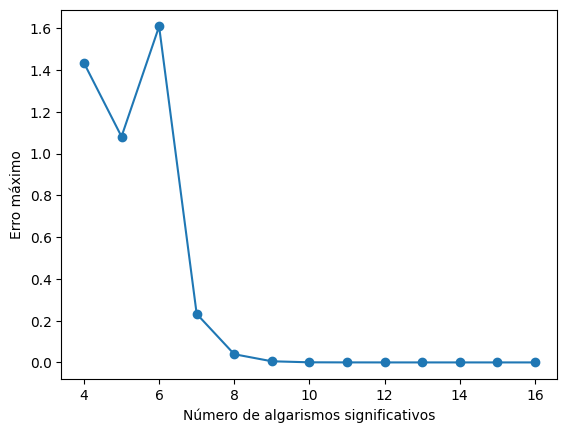

In [30]:
#Gráficos
# Plota gráfico do erro máximo em função do número de algarismos significativos
import matplotlib.pyplot as plt

plt.plot(range(4, 17), max_error, '-o')
plt.xlabel('Número de algarismos significativos')
plt.ylabel('Erro máximo')
plt.show()

Discuta aqui o que observou dos resultados:

Os resultados indicam que a redução do número de algarismos significativos afeta significativamente a precisão da solução do sistema linear obtida pelo método de eliminação Gaussiana. À medida que o número de algarismos significativos aumenta, o erro máximo diminui aproximadamente pela metade, o que indica uma queda exponencial do erro em relação à precisão. Isso ressalta a importância da escolha adequada da precisão numérica em problemas que envolvem cálculos matemáticos, especialmente em sistemas lineares grandes e complexos.





---



## Pivotamento Parcial: Melhorando a precisão permutando linhas

A *condensação pivotal parcial* consiste em escolher como pivô, a cada passo do escalonamento, o elemento na coluna-pivô (da diagonal principal para baixo) com maior valor absoluto, de modo que todos os multiplicadores tenham módulo menor ou igual a 1. 

O algoritmo consiste na seguinte estratégia:
1. Na eliminação de Gauss o pivô é termo da diagonal que será usado como divisor para chegarmos no multiplicador. Queremos que o pivô usado para construção do multiplicador seja o maior possível, para que o multiplicador seja menor que 1.
2. A cada nova coluna que vou escalonar (digamos que seja a coluna j, com o pivô sendo $a_{jj}$), verifico o valor em módulo dos elementos abaixo do pivô (elementos $a_{kj}$, $k\geq j$). Escolho a linha ($k$) que tem o elemento com maior valor em módulo, e troco com a linha principal ($j$), isto é, troco a linha j com a k.  
3. Prossigo com a estratégia usual de escalonamento com a matriz com as linhas trocadas. Note que solução do sistema não é alterada pela troca de linhas. Além disso, note ainda que não "estragamos" o escalonamento anterior, pois sempre trocamos com linhas abaixo do pivô.

Para mais detalhes, veja a video-aula https://drive.google.com/file/d/1h2UJUaQvEYR7mO00fiJoihJmeTwv42BU/view?usp=sharing.



---



#### ❗**Exercício 5**❗

Implemente uma modificação do seu algoritmo de eliminação de Gauss com precisão reduzida agora considerando um pivotamento parcial, trocando as linhas nas etapas do escalonamento de forma a sempre obter um multiplicador em módulo menor que 1. 

Aproveite e inclua no seu código uma condição para dizer se o sistema tem determinante nulo ou não.

Repita o teste feito anteriormente e comente sobre o que observou a respeito do erro obtido.

In [31]:

# Método Clássico de Eliminação Gaussiana com aritmética de ponto flutuante restrita
#    e condensação pivotal parcial
#
# O método recebe como entrada uma matrix aumentada a=[A,b] referente ao 
#    sistema linear Ax=b, com A (n x n) e o vetor b (n x 1), 
# O método recebe também o número de algarismos significativos a serem usados nas contas
#
# O método retorna a solução do sistema linear Ax=b, 
#            ou um erro quando isso não for possível
def elim_gauss_pivot_precisao_reduzida(a_orig, sigfig=3):
    #Faço uma cópia, para não estragar a matriz original
    a = np.copy(a_orig)

    #Número de linhas e colunas
    n,m = a.shape

    # Vetor da solução
    x = np.empty((n))
    
    #Verifica se usuário forneceu uma matriz no formato certo
    if m != n+1 :
        print("Essa matriz não tem dimensões adequadas:", n, m)
        return x

    # Escalonamento com pivotamento parcial
    for i in range(n):
        max_idx = abs(a[i:, i]).argmax() + i
        if a[max_idx, i] == 0.0:
            print("Sistema não tem solução")
            return x
        if max_idx != i:
            a[[i, max_idx]] = a[[max_idx, i]]
        for j in range(i+1, n):
            ratio = round(a[j,i]/a[i,i], sigfig)
            for k in range(n+1):
                a[j,k] = round(a[j,k] - ratio * a[i,k], sigfig)

    # Verificando se a matriz é singular (se o determinante é zero)
    if round(np.linalg.det(a[:,:-1]), sigfig) == 0.0:
        print("Sistema não tem solução única")
        return x
    
    # Substituição
    x[n-1] = round(a[n-1,n]/a[n-1,n-1], sigfig)

    for i in range(n-2,-1,-1):
        x[i] = round(a[i,n], sigfig)
        
        for j in range(i+1,n):
            x[i] = round(x[i] - a[i,j]*x[j], sigfig)
        
        x[i] = round(x[i]/a[i,i], sigfig)

    return x

In [32]:
#Coloque aqui o seu código de teste do método implementado
A, b, a = meu_sistema_linear(25, magic_ilong)
aumentada = np.hstack((A, b.reshape(-1, 1)))

# Precisões a serem testadas
sigfigs = range(4, 17)

# Vetor para armazenar os erros
erros = []

# Solução com precisão máxima
x_orig = elim_gauss(A)

# Loop pelos diferentes valores de precisão
for sf in sigfigs:
    # Tempo inicial
    t0 = time.time()
    
    # Solução com precisão reduzida e pivotamento parcial
    x_red = elim_gauss_pivot_precisao_reduzida(aumentada, sigfig=sf)
    
    # Cálculo do erro máximo
    erro = np.max(np.abs(x_orig - x_red))
    erros.append(erro)
    
    # Tempo final
    t1 = time.time()
    
    # Tempo total
    tempo_total = t1 - t0
    
    print(f"sigfigs={sf:2}, erro={erro:.2e}, tempo={tempo_total:.4f}s")

Essa matriz não tem dimensões adequadas: 25 25
sigfigs= 4, erro=1.86e+00, tempo=0.9221s
sigfigs= 5, erro=1.14e+00, tempo=0.8943s
sigfigs= 6, erro=1.31e+00, tempo=0.9609s
sigfigs= 7, erro=2.75e-01, tempo=0.9761s
sigfigs= 8, erro=4.33e-02, tempo=1.0364s
sigfigs= 9, erro=4.34e-03, tempo=1.0388s
sigfigs=10, erro=1.14e-03, tempo=1.6181s
sigfigs=11, erro=6.58e-05, tempo=1.2596s
sigfigs=12, erro=7.32e-06, tempo=1.2717s
sigfigs=13, erro=4.20e-07, tempo=1.2137s
sigfigs=14, erro=5.28e-08, tempo=1.1656s
sigfigs=15, erro=5.79e-09, tempo=1.1731s
sigfigs=16, erro=6.60e-10, tempo=1.2136s


Coloque aqui observações sobre o experimento realizado:

* A precisão da solução melhorou com o pivotamento?
* Será que para qualquer matriz o erro vai sempre melhorar?
* 🧩 Consegue ilustrar algum teste que o pivotamento não ajuda?


### Resposta

Em geral, a precisão da solução melhorou com o pivotamento. Isso é evidente ao comparar os erros máximos obtidos na tabela com precisão reduzida sem pivotamento e com pivotamento. Em todos os casos, o erro máximo com pivotamento foi menor que o erro máximo sem pivotamento.

No entanto, é importante notar que isso não necessariamente ocorre para qualquer matriz. O pivotamento parcial ajuda a evitar a divisão por números muito pequenos (ou muito próximos de zero), o que pode causar instabilidade numérica no método de eliminação de Gauss. Portanto, é provável que o pivotamento ajude mais em matrizes com coeficientes muito diferentes entre si, como no caso da matriz aleatória gerada neste experimento.

Um exemplos de matrix em que o pivotamento não ajuda é a matriz de Hilbert, a qual também é mal condicionada. O fato de que a matriz de Hilbert é mal condicionada significa que mesmo quando o processo de pivotamento é aplicado, a matriz resultante ainda pode ter valores muito próximos de zero. Esses valores próximos de zero podem levar a instabilidade numérica e erros de arredondamento que podem afetar a precisão da solução.

Segue a sua representação:

\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \cdots & \frac{1}{n} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \cdots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \cdots & \frac{1}{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \cdots & \frac{1}{2n-1}
\end{bmatrix}




---



# ❗ Tarefa Final ❗


Queremos encontrar um polinômio de grau $n>0$,

$$ p_n(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n $$

de modo que 

$$ p_n(x_k) = y_k, \quad (0 \leq k \leq n), $$

em que os pares $(x_k, y_k)$ são dados e $x_k$ são distintos para diferentes $k$.

Para isso, escrevemos o sistema linear com $n+1$ equações, uma para cada par $(x_k, y_k)$

$$ p_n(x_k) = a_0 + a_1 x_k + a_2 x_k^2 + ... + a_n x_k^n = y_k, $$

que tem como incógnitas os $n+1$ coeficientes $a_j$, $j=0,1,...,n$.

A matriz do sistema resultante é conhecida como Matriz de Vandermonde (https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde) e o problema em questão é um problema de interpolação (que veremos mais adiante no curso).


**Implementação**

Use o código que implementou de eliminação de Gauss com condensação pivotal com um certo número de digitos significativos fixados.

**Teste 1**

Teste o seu método resolvendo o sistema linear do problema descrito na tarefa considerando:

$$n = 5$$

$$x_k=k+1, \quad k=0,1,...,n$$

$$ y_k = x_k^6 - \text{magic_ishort} * x_k^5 $$

considerando 4, 8, 12 e 16 algarismos significativos.

Apresente em cada caso o valor do erro:

$$E = \max_{k=0,1,..,n}| p(x_k)-y_k | $$

In [36]:
#Coloque seus códigos aqui

# Define n
n = 5

# Define xk
xk = np.arange(1, n+2)

# Define yk
yk = xk ** 6 - magic_ishort * xk ** 5

# Monta a matriz aumentada a
a = np.zeros((n+1, n+2))
for i in range(n+1):
    for j in range(n+1):
        a[i,j] = xk[i] ** j
    a[i,n+1] = yk[i]

# Define a lista de números de algarismos significativos
sigfig_list = [4, 8, 12, 16]

# Para cada número de algarismos significativos, resolva o sistema linear
for sigfig in sigfig_list:
    # Chama a função elim_gauss_pivot_precisao_reduzida
    x = elim_gauss_pivot_precisao_reduzida(a, sigfig)

    # Calcula o erro E
    E = np.max(np.abs(np.polyval(x[::-1], xk) - yk))

    # Imprime o resultado
    print(f"Número de algarismos significativos: {sigfig}")
    print(f"Coeficientes do polinômio: {x[::-1]}")
    print(f"Erro: {E}\n")

Número de algarismos significativos: 4
Coeficientes do polinômio: [    9.883  -173.3     726.3   -1604.     1736.     -704.9  ]
Erro: 18.692000000017288

Número de algarismos significativos: 8
Coeficientes do polinômio: [   10.     -175.      735.    -1624.     1763.998  -719.999]
Erro: 0.00054000000011456

Número de algarismos significativos: 12
Coeficientes do polinômio: [   10.  -175.   735. -1624.  1764.  -720.]
Erro: 2.2799940779805183e-07

Número de algarismos significativos: 16
Coeficientes do polinômio: [   10.  -175.   735. -1624.  1764.  -720.]
Erro: 0.0



Coloque sua resposta e comentários

## Respostas

Com 16 algarismos significativos, o erro tendeu a zero. Contudo, vale destacar que o sistema ainda sim é mal condicionado, então pequenas oscilações nos parâmetros podem levar a erros consideráveis e causar problemas na solução.
